In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


## Домашнее задание
### 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$
1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .
2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

**Примечание.**

Такая плотность вероятности не будет нормируема. Чтобы сделать рассуждение более строгим, можно ввести обрезку на очень больших $\lambda$ (так как это нереалистичные значения). Другими словами, можно считать, что априорная плотность вероятности $p_0(\lambda)-$ это какая-то очень медленно меняющаяся функция и как-то убывающая на бесконечности. Тогда в числителе и знаменателе формулы Байеса она будет домножаться на гораздо более быструю функцию и поэтому можно заменить $p_0(\lambda) \rightarrow p_0(0)$. Константа $p_0(0)$ должна сократиться в ходе вычислений.

1.

Априорное распределение $\lambda$:
$$
p_0(\lambda) = \text{const}.
$$

Функция правдоподобия для $m$ срабатываний:
$$
P(m \mid \lambda) = \frac{\lambda^m}{m!} e^{-\lambda}.
$$

По теореме Байеса апостериорная плотность пропорциональна:
$$
p(\lambda \mid m) \propto p_0(\lambda) \cdot P(m \mid \lambda) \propto \lambda^m e^{-\lambda}.
$$

Это гамма-распределение с параметрами $\alpha = m + 1, \quad \beta = 1$.

Нормированная плотность:
$$
p(\lambda \mid m) = \frac{1}{\Gamma(m+1)} \lambda^m e^{-\lambda}.
$$

2.

Теперь априорное распределение — это апостериорное из первого эксперимента:
$$
p_0(\lambda) = p(\lambda \mid m) = \frac{1}{\Gamma(m+1)} \lambda^m e^{-\lambda}.
$$

Функция правдоподобия для $m'$ срабатываний:
$$
P(m' \mid \lambda) = \frac{\lambda^{m'}}{m'!} e^{-\lambda}.
$$

Апостериорная плотность после второго эксперимента:
$$
p(\lambda \mid m, m') \propto p_0(\lambda) \cdot P(m' \mid \lambda) \propto \lambda^m e^{-\lambda} \cdot \lambda^{m'} e^{-\lambda} = \lambda^{m + m'} e^{-2\lambda}.
$$

Это гамма-распределение с параметрами $\alpha = m + m' + 1, \quad \beta = 2$.

Нормированная плотность:
$$
p(\lambda \mid m, m') = \frac{2^{m + m' + 1}}{\Gamma(m + m' + 1)} \lambda^{m + m'} e^{-2\lambda}.
$$



### 2. Апостериорное распределение для аргумента нормального распределения.

Пусть имеется априорное распределение на вектор $\boldsymbol{x}$, задаваемое симметричной положительно определенной матрицей $A$ :
$$
p_0(\boldsymbol{x})=\frac{1}{Z} e^{-\frac{\boldsymbol{x}^T A \boldsymbol{x}}{2}} .
$$
Было произведено измерение величин $\boldsymbol{x}$, которое дало значение $\boldsymbol{x}_1$. Найдете апостериорное распределение на $\boldsymbol{x}$.

Hint: Мы изначально ничего не знаем об $A$ - надо ввести на него какое-то априорное распределение. Предлагается брать равномерное.

Априорное распределение на вектор $\boldsymbol{x}$ при фиксированной матрице $A$:
$$
p(\boldsymbol{x} | A) = \frac{|A|^{1/2}}{(2\pi)^{n/2}} e^{-\frac{1}{2} \boldsymbol{x}^T A \boldsymbol{x}}.
$$
Априорное распределение на $A$:
$$
p(A) = \text{const}.
$$

После измерения $\boldsymbol{x}_1$ правдоподобие для $A$:
$$
p(\boldsymbol{x}_1 | A) = \frac{|A|^{1/2}}{(2\pi)^{n/2}} e^{-\frac{1}{2} \boldsymbol{x}_1^T A \boldsymbol{x}_1}.
$$
По теореме Байеса апостериорное распределение на $A$:
$$
p(A | \boldsymbol{x}_1) \propto p(\boldsymbol{x}_1 | A) p(A) \propto |A|^{1/2} e^{-\frac{1}{2} \boldsymbol{x}_1^T A \boldsymbol{x}_1}.
$$

Апостериорное распределение на $\boldsymbol{x}$ получается усреднением по $A$:
$$
p(\boldsymbol{x} | \boldsymbol{x}_1) = \int p(\boldsymbol{x} | A) p(A | \boldsymbol{x}_1) dA \propto \int |A| e^{-\frac{1}{2} \boldsymbol{x}^T A \boldsymbol{x} - \frac{1}{2} \boldsymbol{x}_1^T A \boldsymbol{x}_1} dA.
$$
Обозначим $S = \boldsymbol{x} \boldsymbol{x}^T + \boldsymbol{x}_1 \boldsymbol{x}_1^T$. Тогда интеграл сводится к:
$$
p(\boldsymbol{x} | \boldsymbol{x}_1) \propto \int |A| e^{-\frac{1}{2} \text{tr}(A S)} dA.
$$


### 3. L1-регуляризация.

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

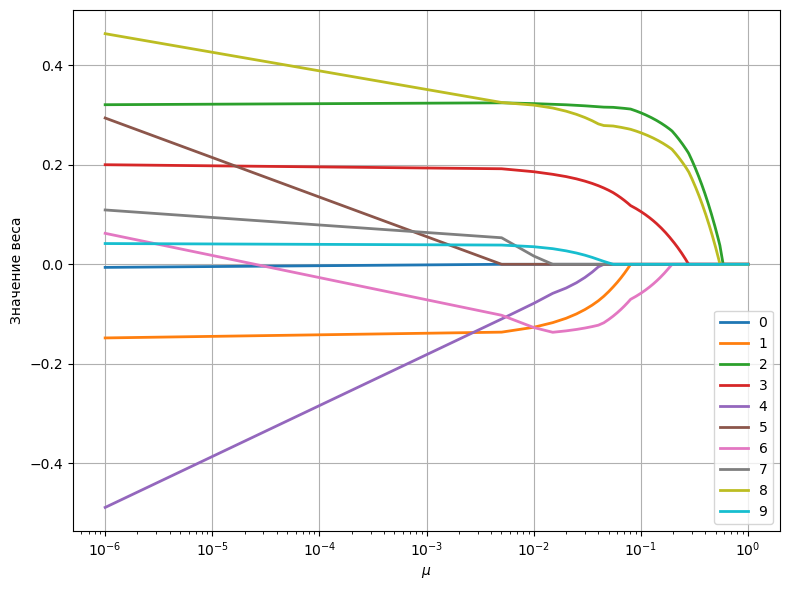

In [4]:
data, target = load_diabetes(return_X_y=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
target_scaled = (target - target.mean()) / target.std()
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)

weights = []

for alpha in alpha_linspace:
    lm = Lasso(alpha=alpha, max_iter=10000)
    lm.fit(data_scaled, target_scaled)
    weights.append(lm.coef_)

weights = np.array(weights)


plt.figure(figsize=(8, 6))
for i in range(weights.shape[1]):
    plt.semilogx(alpha_linspace, weights[:, i],
                label=f'{i}', linewidth=2)

plt.xlabel('$\\mu$')
plt.ylabel('Значение веса')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.

На семинаре обсуждалось решение задачи регрессии с $L 1$-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

Указание.
Можно взять функцию градиентного спуска из семинара или встроенную реализацию.  Например, можете использовать этот код

In [ ]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w

K-Fold Cross-Validation Results:
mu\alpha	0.05000	0.08000	0.08500	0.09000	0.09500	0.01000	0.01200
5.0e-07	0.0954	0.0760	0.0732	0.0711	0.0688	0.1507	0.1396
1.0e-07	0.0949	0.0759	0.0734	0.0712	0.0686	0.1502	0.1404
5.0e-08	0.0949	0.0757	0.0734	0.0711	0.0684	0.1501	0.1408
1.0e-08	0.0948	0.0762	0.0736	0.0707	0.0682	0.1501	0.1413
5.0e-09	0.0955	0.0763	0.0735	0.0708	0.0683	0.1503	0.1405

Best parameters: mu=1e-08, alpha=0.095
Best CV score: 0.0682

Stability Analysis:
Run 1: MSE = 0.0782
Run 2: MSE = 0.0637
Run 3: MSE = 0.0624
Run 4: MSE = 0.0903
Run 5: MSE = 0.0595
Run 6: MSE = 0.0812
Run 7: MSE = 0.0655
Run 8: MSE = 0.0879
Run 9: MSE = 0.0537
Run 10: MSE = 0.0655


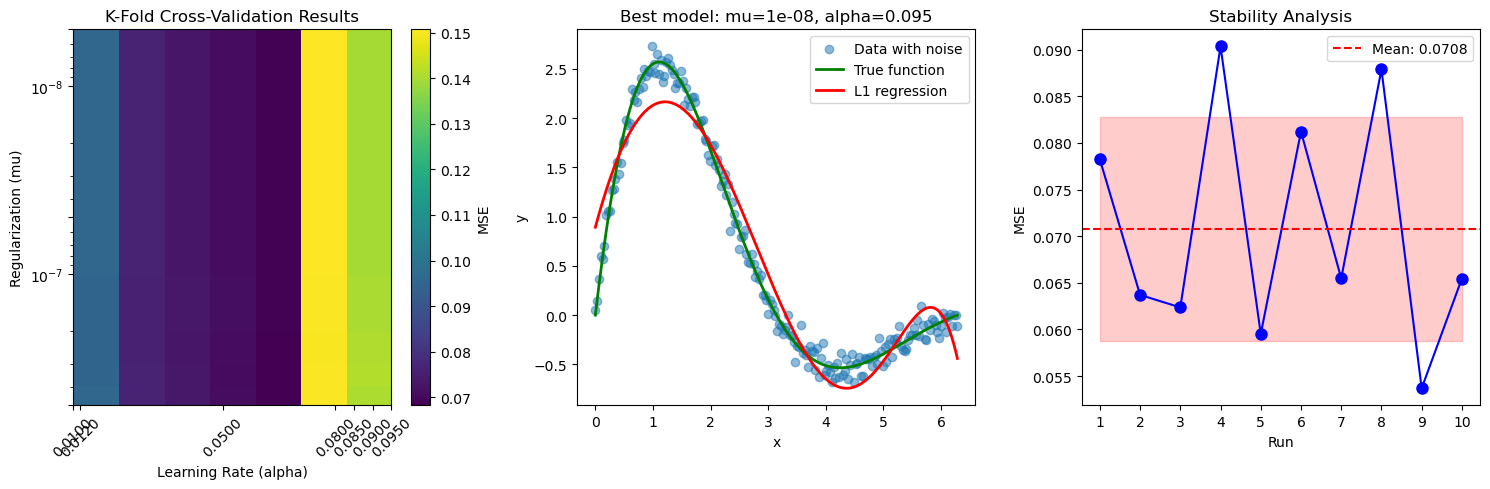


Model weights analysis:
Non-zero weights: 11/11
Weight magnitudes: [ 0.60192335  3.96342622 11.3399827   0.55421424  5.3577607   4.08533158
  0.94123308  1.44254448  2.30890586  1.35486348  0.86056647]
L1 norm of weights: 32.8108


In [39]:
np.random.seed(42)
x = np.linspace(0, 2*np.pi, 200)
y = 5*np.exp(-0.5*x)*np.sin(x) + 0.1*np.random.normal(0, 1, 200)

poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(x.reshape(-1, 1))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly[:, 1:])
X_scaled = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])

def L1_gradient_descent(X, y, mu, alpha, n_iter=20000, tol=1e-5):
    n_samples, n_features = X.shape
    w = np.random.normal(0, 0.1, n_features)

    for i in range(n_iter):
        w_old = w.copy()

        grad = 2 * (X @ w - y) @ X / n_samples + 2 * mu * np.sign(w)
        w -= alpha * grad
        if np.linalg.norm(w - w_old) < tol:
            break

    return w

kf = KFold(n_splits=3, shuffle=True, random_state=42)

#параметры
mu_values = [5e-7, 1e-7, 5e-8, 1e-8, 5e-9]
#alpha_values = [0.1, 0.12, 0.15, 0.18, 0.2]

#mu_values = [0.001, 0.005, 0.01, 0.0005, 0.0001, 0.00005, 0.00001]
alpha_values = [0.05,0.08,0.085, 0.09,0.095,0.010,0.012]


best_mu = None
best_alpha = None
best_score = float('inf')

results = np.zeros((len(mu_values), len(alpha_values)))

print("K-Fold Cross-Validation Results:")
print("mu\\alpha", end="")
for alpha in alpha_values:
    print(f"\t{alpha:.5f}", end="")
print()

for i, mu in enumerate(mu_values):
    print(f"{mu:.1e}", end="")
    for j, alpha in enumerate(alpha_values):
        fold_scores = []

        for train_idx, val_idx in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            w = L1_gradient_descent(X_train, y_train, mu, alpha)

            y_pred = X_val @ w
            score = mean_squared_error(y_val, y_pred)
            fold_scores.append(score)

        avg_score = np.mean(fold_scores)
        results[i, j] = avg_score

        print(f"\t{avg_score:.4f}", end="")

        if avg_score < best_score:
            best_score = avg_score
            best_mu = mu
            best_alpha = alpha

    print()

print(f"\nBest parameters: mu={best_mu}, alpha={best_alpha}")
print(f"Best CV score: {best_score:.4f}")

#Анализ стабильности
print("\nStability Analysis:")
stability_scores = []

for run in range(10):
    np.random.seed(run)

    indices = np.random.permutation(len(X_scaled))
    split_idx = int(0.7 * len(X_scaled))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    w = L1_gradient_descent(X_train, y_train, best_mu, best_alpha)

    y_pred = X_test @ w
    score = mean_squared_error(y_test, y_pred)
    stability_scores.append(score)
    print(f"Run {run+1}: MSE = {score:.4f}")


# Визуализация результатов
plt.figure(figsize=(15, 5))

#1
plt.subplot(1, 3, 1)
im = plt.imshow(results, cmap='viridis', aspect='auto',
                extent=[min(alpha_values), max(alpha_values),
                       max(mu_values), min(mu_values)])
plt.colorbar(im, label='MSE')
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Regularization (mu)')
plt.title('K-Fold Cross-Validation Results')
plt.xticks(alpha_values, [f'{a:.4f}' for a in alpha_values], rotation=45)
plt.yscale('log')
plt.yticks(mu_values)

# 2. Лучшая модель
plt.subplot(1, 3, 2)
w_final = L1_gradient_descent(X_scaled, y, best_mu, best_alpha)
y_pred_final = X_scaled @ w_final

plt.scatter(x, y, alpha=0.5, label='Data with noise')
plt.plot(x, 5*np.exp(-0.5*x)*np.sin(x), 'g-', label='True function', linewidth=2)
plt.plot(x, y_pred_final, 'r-', label='L1 regression', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Best model: mu={best_mu}, alpha={best_alpha}')

# 3. Анализ стабильности
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), stability_scores, 'bo-', markersize=8)
plt.axhline(y=np.mean(stability_scores), color='r', linestyle='--',
           label=f'Mean: {np.mean(stability_scores):.4f}')
plt.fill_between(range(1, 11),
                np.mean(stability_scores) - np.std(stability_scores),
                np.mean(stability_scores) + np.std(stability_scores),
                alpha=0.2, color='red')
plt.xlabel('Run')
plt.ylabel('MSE')
plt.title('Stability Analysis')
plt.legend()
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()

# Анализ весов модели
print(f"\nModel weights analysis:")
print(f"Non-zero weights: {np.sum(w_final != 0)}/{len(w_final)}")
print(f"Weight magnitudes: {np.abs(w_final)}")
print(f"L1 norm of weights: {np.sum(np.abs(w_final)):.4f}")

### 5. Лассо Тибширани: связь L1 и L2 между собой.


Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^2 \rightarrow \min _w, \quad \sum_\alpha\left|w_\alpha\right|<C
$$
эквивалентна L1-регуляризации. Указание: можно воспользоваться условиями Каруша - Куна — Таккера (обобщение метода Лагранжа).
[Link](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0) .

Рассмотрим задачу Лассо:
$$\min_w \|Xw-y\|^2 \quad \text{при} \quad \sum_\alpha|w_\alpha| \leq C$$

Функция Лагранжа:
$$L(w,\lambda) = \|Xw-y\|^2 + \lambda\left(\sum_\alpha|w_\alpha|-C\right), \quad \lambda \geq 0$$

Условия Каруша-Куна-Таккера:
- Стационарность: $2X^T(Xw-y) + \lambda\cdot\partial\left(\sum_\alpha|w_\alpha|\right) \ni 0$
- Дополняющая нежёсткость: $\lambda\left(\sum_\alpha|w_\alpha|-C\right) = 0$

Для L1-регуляризации:
$$\min_w \left\{\|Xw-y\|^2 + \mu\sum_\alpha|w_\alpha|\right\}$$

Условие оптимальности:
$$2X^T(Xw-y) + \mu\cdot\partial\left(\sum_\alpha|w_\alpha|\right) \ni 0$$

Условия совпадают при $\mu = \lambda$. При $\lambda > 0$ ограничение $\sum|w_\alpha| = C$ Для любого $C > 0$ существует $\mu \geq 0$ такое, что решения обеих задач совпадают, и наоборот.